<a href="https://colab.research.google.com/github/MohdSharik99/CO2-Emission-Regression/blob/main/CO2_Emission_projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
sns.set(style="darkgrid")
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('/content/CO2 Emissions_Canada.csv')

In [4]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [6]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [7]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [8]:
df.nunique()

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

In [9]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [10]:
num_features = ['Engine Size(L)','Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)' ]

cat_features = []

for i in df.columns:
  if i not in num_features and 'Model':
    cat_features.append(i)
cat_features

['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

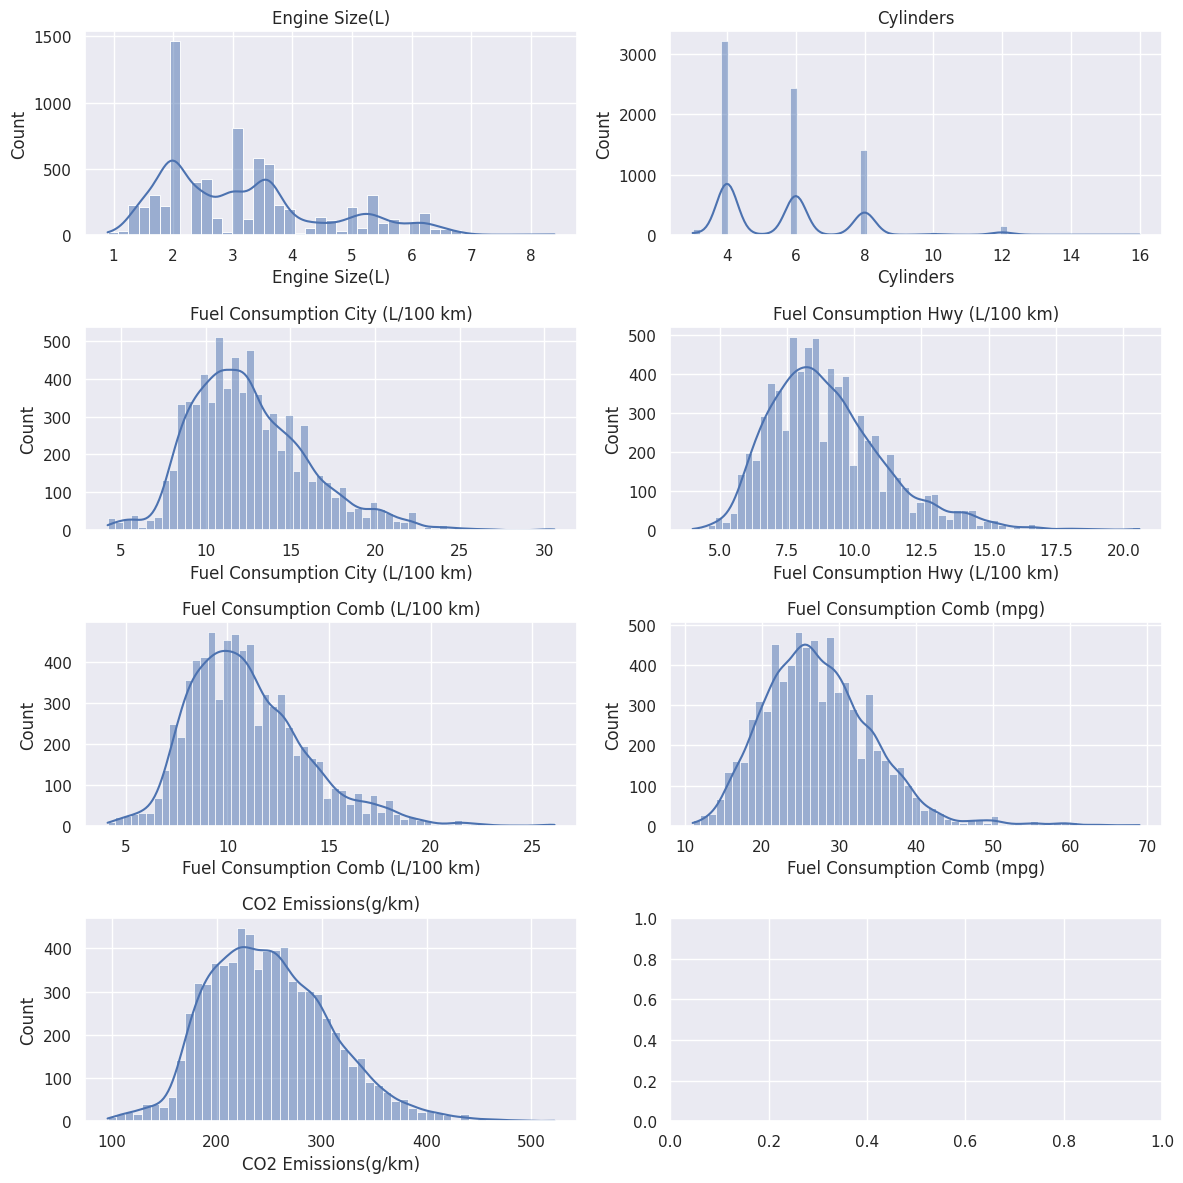

In [11]:
fig, axs = plt.subplots(4, 2, figsize=(12, 12))

# Iterate through num_features and plot each feature in a subplot
for i, feature in enumerate(num_features):
    row = i // 2  # Calculate the row index (0 to 3)
    col = i % 2   # Calculate the column index (0 or 1)

    sns.histplot(data=df, x=feature, kde=True, ax=axs[row, col])
    axs[row, col].set_title(feature)  # Set subplot title

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

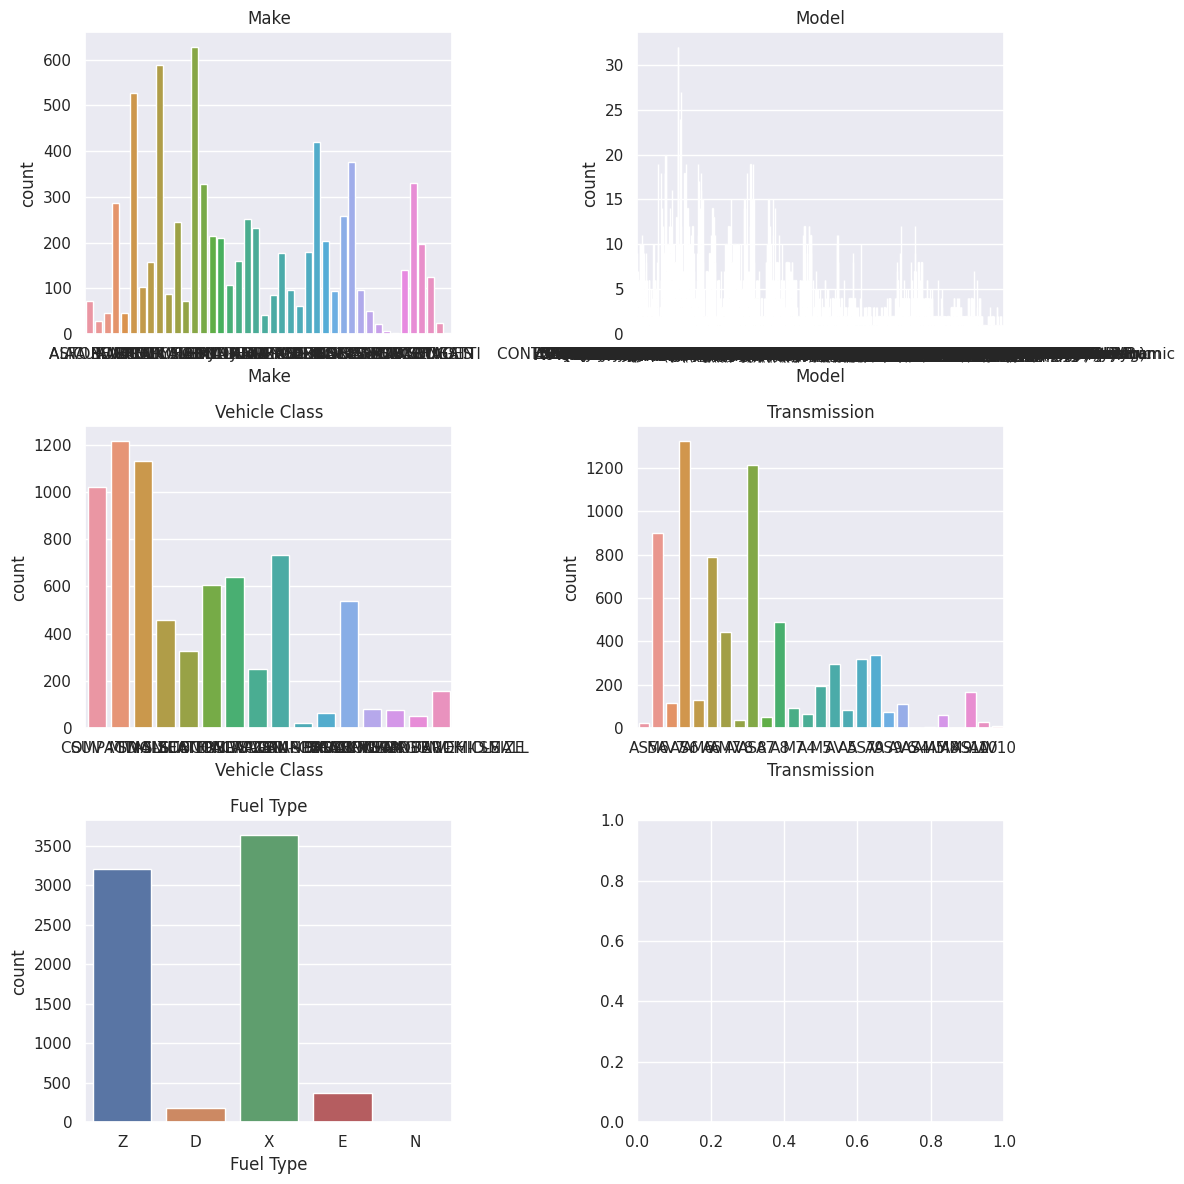

In [12]:
fig, ax = plt.subplots(3,2, figsize= (12,12))

for i, feature in enumerate(cat_features):
  row  = i//2
  col = i%2

  sns.countplot(data = df, x = feature, ax= ax[row, col])
  ax[row, col].set_title(feature)

plt.tight_layout()
plt.show()





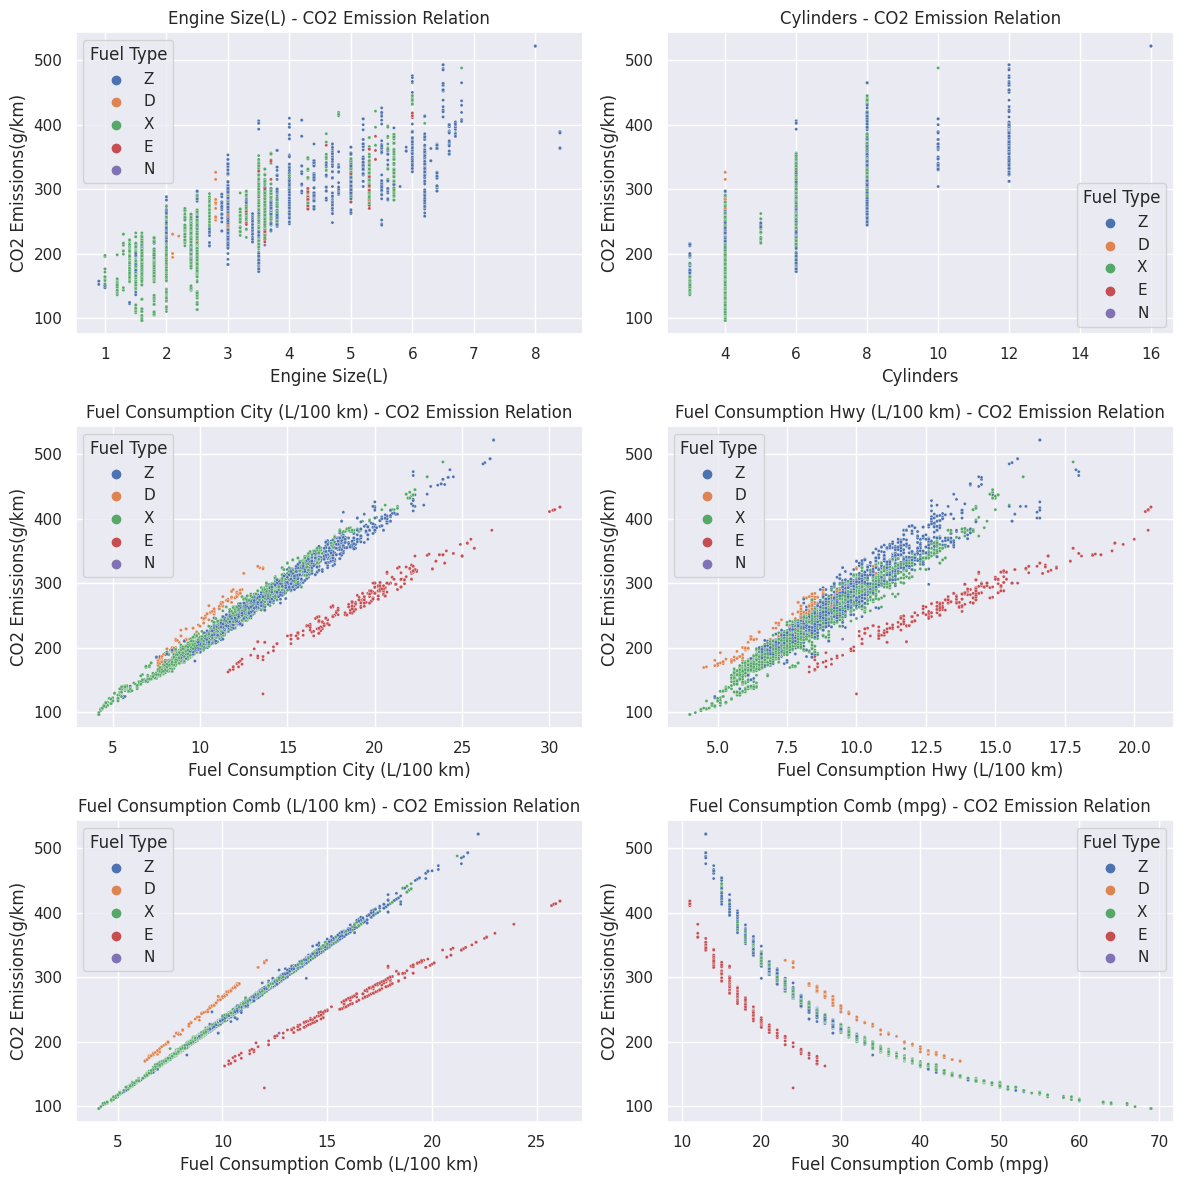

In [13]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))

for i, feature in enumerate(num_features):
    row = i // 2
    col = i % 2
    if feature != 'CO2 Emissions(g/km)':
        ax_current = ax[row, col]
        sns.scatterplot(data=df, x=feature, y='CO2 Emissions(g/km)', hue='Fuel Type', ax=ax_current, s=5)
        ax_current.set_title(f'{feature} - CO2 Emission Relation')

plt.tight_layout()
plt.show()



<ipython-input-14-d7d72c698a14>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True)


<Axes: >

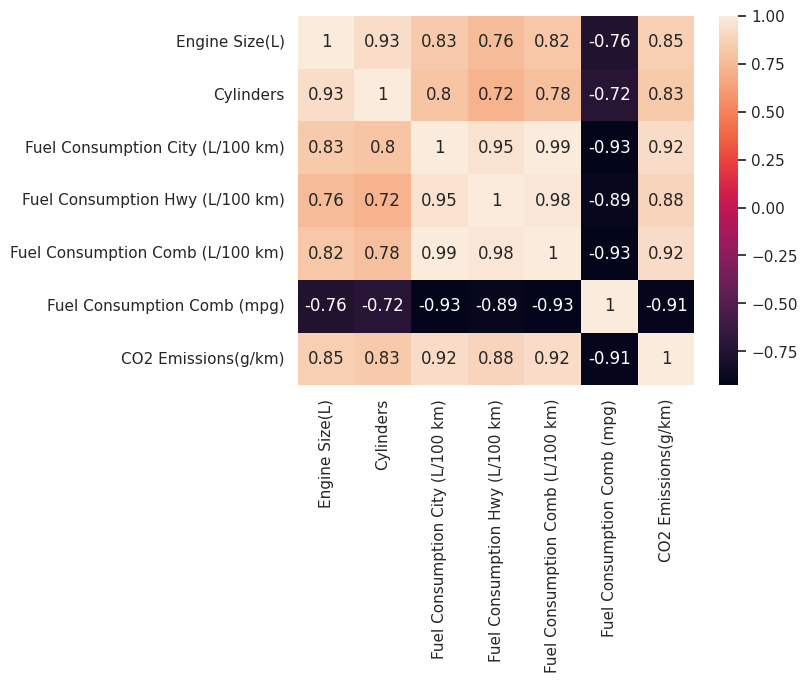

In [14]:
sns.heatmap(df.corr(), annot= True)

## Data Preparation

In [15]:
df.nunique()

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

In [16]:
X = df.drop('CO2 Emissions(g/km)', axis= 1)
y = df['CO2 Emissions(g/km)']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state = 42)

In [18]:
# X_train = X_train.drop('Model', axis=1)

In [19]:
num_features = ['Engine Size(L)','Cylinders', 'Fuel Consumption City (L/100 km)',
        'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
        'Fuel Consumption Comb (mpg)']

sc = StandardScaler()

transformed_data = sc.fit_transform(X_train[num_features])
transformed_data = pd.DataFrame(transformed_data, columns= num_features).reset_index()

In [20]:
def prep_func(data, transformed_data):

  num_features = ['Engine Size(L)','Cylinders', 'Fuel Consumption City (L/100 km)',
        'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
        'Fuel Consumption Comb (mpg)']

  cat_features = []

  for i in df.columns:
    if i not in num_features +['Model','CO2 Emissions(g/km)' ]:
      cat_features.append(i)
  cat_features


  def categorize_vehicle_class(vehicle_class):
      if "SUV" in vehicle_class:
          return "SUV"
      elif vehicle_class in ["MID-SIZE", "COMPACT", "FULL-SIZE", "SUBCOMPACT", "MINICOMPACT"]:
          return "SEDAN"
      elif "PICKUP TRUCK" in vehicle_class:
          return "PICKUP TRUCK"
      elif vehicle_class == "TWO-SEATER":
          return "SPORTS CAR"
      elif "STATION WAGON" in vehicle_class:
          return "STATION WAGON"
      elif vehicle_class == "MINIVAN":
          return "MINIVAN"
      elif vehicle_class == "SPECIAL PURPOSE VEHICLE":
          return "SPECIAL PURPOSE VEHICLE"
      elif "VAN" in vehicle_class:
          return "VAN"
      else:
          return "OTHER"


  data['Vehicle Class'] = data['Vehicle Class'].apply(lambda x:categorize_vehicle_class(x) )

  dummy_df = pd.get_dummies(data[cat_features]).reset_index()
  prepared_data = pd.concat([transformed_data, dummy_df], axis= 1).drop('index', axis=1)


  return prepared_data





In [21]:
 X_train_data= prep_func(X_train, transformed_data )

# Model

In [22]:
X_test

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
7261,PORSCHE,Panamera 4 Executive,FULL-SIZE,3.0,6,AM8,Z,12.4,9.0,10.9,26
4489,BMW,M6 CABRIOLET,SUBCOMPACT,4.4,8,AM7,Z,17.3,11.6,14.7,19
1539,GMC,SIERRA,PICKUP TRUCK - STANDARD,6.2,8,A8,Z,16.1,11.4,14.0,20
3532,CHEVROLET,SILVERADO,PICKUP TRUCK - STANDARD,5.3,8,A6,X,14.6,10.3,12.7,22
6418,TOYOTA,4Runner 4WD,SUV - STANDARD,4.0,6,AS5,X,14.3,11.9,13.2,21
...,...,...,...,...,...,...,...,...,...,...,...
7185,MERCEDES-BENZ,C 300 4MATIC Coupe,SUBCOMPACT,2.0,4,A9,Z,10.9,7.7,9.5,30
1740,KIA,SPORTAGE AWD,SUV - SMALL,2.0,4,AS6,X,12.6,9.7,11.3,25
4609,CHEVROLET,SONIC 5,STATION WAGON - SMALL,1.4,4,AS6,X,8.8,6.6,7.8,36
1844,MERCEDES-BENZ,E 300 4MATIC,MID-SIZE,3.5,6,AS7,Z,11.9,8.2,10.2,28


In [23]:
# d_model = DecisionTreeRegressor()

# d_model.fit(g, y_train)

In [24]:
X_test_transoformed = sc.fit_transform(X_test[num_features])
X_test_transoformed = pd.DataFrame(X_test_transoformed, columns= num_features).reset_index().drop('index', axis=1)

In [25]:
X_test_data = prep_func(X_test, X_test_transoformed )

In [26]:
X_test_data

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,-0.104857,0.231922,-0.025476,-0.002809,-0.007476,-0.223785,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.945643,1.340495,1.377693,1.144762,1.299625,-1.172028,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2.296287,1.340495,1.034060,1.056488,1.058843,-1.036565,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.620965,1.340495,0.604518,0.570977,0.611677,-0.765638,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.645500,0.231922,0.518610,1.277174,0.783664,-0.901101,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,-0.855214,-0.876651,-0.455017,-0.576595,-0.489039,0.318068,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1473,-0.855214,-0.876651,0.031796,0.306153,0.130114,-0.359248,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1474,-1.305429,-0.876651,-1.056376,-1.062106,-1.073794,1.130848,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1475,0.270322,0.231922,-0.168656,-0.355908,-0.248257,0.047142,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
X_test_transoformed.columns

Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)'],
      dtype='object')

In [28]:
X_train_data.columns

Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'Make_ACURA', 'Make_ALFA ROMEO',
       'Make_ASTON MARTIN', 'Make_AUDI', 'Make_BENTLEY', 'Make_BMW',
       'Make_BUGATTI', 'Make_BUICK', 'Make_CADILLAC', 'Make_CHEVROLET',
       'Make_CHRYSLER', 'Make_DODGE', 'Make_FIAT', 'Make_FORD', 'Make_GENESIS',
       'Make_GMC', 'Make_HONDA', 'Make_HYUNDAI', 'Make_INFINITI',
       'Make_JAGUAR', 'Make_JEEP', 'Make_KIA', 'Make_LAMBORGHINI',
       'Make_LAND ROVER', 'Make_LEXUS', 'Make_LINCOLN', 'Make_MASERATI',
       'Make_MAZDA', 'Make_MERCEDES-BENZ', 'Make_MINI', 'Make_MITSUBISHI',
       'Make_NISSAN', 'Make_PORSCHE', 'Make_RAM', 'Make_ROLLS-ROYCE',
       'Make_SCION', 'Make_SMART', 'Make_SRT', 'Make_SUBARU', 'Make_TOYOTA',
       'Make_VOLKSWAGEN', 'Make_VOLVO', 'Vehicle Class_MINIVAN',
       'Vehicle Class_PICKUP TRUCK', 'Vehicle Class_SEDAN',
   

In [29]:
X_test_data.columns

Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'Make_ACURA', 'Make_ALFA ROMEO',
       'Make_ASTON MARTIN', 'Make_AUDI', 'Make_BENTLEY', 'Make_BMW',
       'Make_BUICK', 'Make_CADILLAC', 'Make_CHEVROLET', 'Make_CHRYSLER',
       'Make_DODGE', 'Make_FIAT', 'Make_FORD', 'Make_GENESIS', 'Make_GMC',
       'Make_HONDA', 'Make_HYUNDAI', 'Make_INFINITI', 'Make_JAGUAR',
       'Make_JEEP', 'Make_KIA', 'Make_LAMBORGHINI', 'Make_LAND ROVER',
       'Make_LEXUS', 'Make_LINCOLN', 'Make_MASERATI', 'Make_MAZDA',
       'Make_MERCEDES-BENZ', 'Make_MINI', 'Make_MITSUBISHI', 'Make_NISSAN',
       'Make_PORSCHE', 'Make_RAM', 'Make_ROLLS-ROYCE', 'Make_SCION',
       'Make_SUBARU', 'Make_TOYOTA', 'Make_VOLKSWAGEN', 'Make_VOLVO',
       'Vehicle Class_MINIVAN', 'Vehicle Class_PICKUP TRUCK',
       'Vehicle Class_SEDAN', 'Vehicle Class_SPECIAL PURPOSE VEHICLE',
    

In [30]:
# Step 1: Align the columns
X_train_data, X_test_data = X_train_data.align(X_test_data, axis=1, fill_value=0)


In [31]:
X_train_data

,Cylinders,Engine Size(L),Fuel Consumption City (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Fuel Consumption Hwy (L/100 km),Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,...,Transmission_M6,Transmission_M7,Vehicle Class_MINIVAN,Vehicle Class_PICKUP TRUCK,Vehicle Class_SEDAN,Vehicle Class_SPECIAL PURPOSE VEHICLE,Vehicle Class_SPORTS CAR,Vehicle Class_STATION WAGON,Vehicle Class_SUV,Vehicle Class_VAN
0,0.205342,-0.121493,-0.335091,-0.376817,0.217020,-0.429379,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.205342,0.614166,0.607277,0.592571,-0.756204,0.564406,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.205342,-0.121493,0.350268,0.246361,-0.478140,-0.022831,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0.205342,0.172770,-0.363647,-0.411438,0.217020,-0.519723,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-0.885139,-0.857153,-0.706327,-0.792268,0.634115,-0.926271,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5903,-0.885139,-0.857153,-0.649213,-0.688405,0.495083,-0.745583,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
5904,0.205342,0.246336,-0.563544,-0.653784,0.495083,-0.790755,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5905,0.205342,0.246336,-0.249421,-0.203712,-0.061044,-0.113175,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5906,-0.885139,-0.489323,-0.877666,-0.826889,0.773147,-0.745583,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [32]:
X_test_data

,Cylinders,Engine Size(L),Fuel Consumption City (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Fuel Consumption Hwy (L/100 km),Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,...,Transmission_M6,Transmission_M7,Vehicle Class_MINIVAN,Vehicle Class_PICKUP TRUCK,Vehicle Class_SEDAN,Vehicle Class_SPECIAL PURPOSE VEHICLE,Vehicle Class_SPORTS CAR,Vehicle Class_STATION WAGON,Vehicle Class_SUV,Vehicle Class_VAN
0,0.231922,-0.104857,-0.025476,-0.007476,-0.223785,-0.002809,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1.340495,0.945643,1.377693,1.299625,-1.172028,1.144762,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1.340495,2.296287,1.034060,1.058843,-1.036565,1.056488,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1.340495,1.620965,0.604518,0.611677,-0.765638,0.570977,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0.231922,0.645500,0.518610,0.783664,-0.901101,1.277174,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,-0.876651,-0.855214,-0.455017,-0.489039,0.318068,-0.576595,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1473,-0.876651,-0.855214,0.031796,0.130114,-0.359248,0.306153,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1474,-0.876651,-1.305429,-1.056376,-1.073794,1.130848,-1.062106,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1475,0.231922,0.270322,-0.168656,-0.248257,0.047142,-0.355908,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [42]:

models = {

    "svr" : SVR(kernel='linear',
          epsilon=0.1),
    "knn" : KNeighborsRegressor(n_neighbors=5,
                          algorithm='auto',
                          metric='minkowski'),
    "linear regression" : LinearRegression(),

    "random forest" : RandomForestRegressor(n_estimators= 200, criterion = 'squared_error', oob_score =True)


}
models


{'svr': SVR(kernel='linear'),
 'knn': KNeighborsRegressor(),
 'linear regression': LinearRegression(),
 'random forest': RandomForestRegressor(n_estimators=200, oob_score=True)}

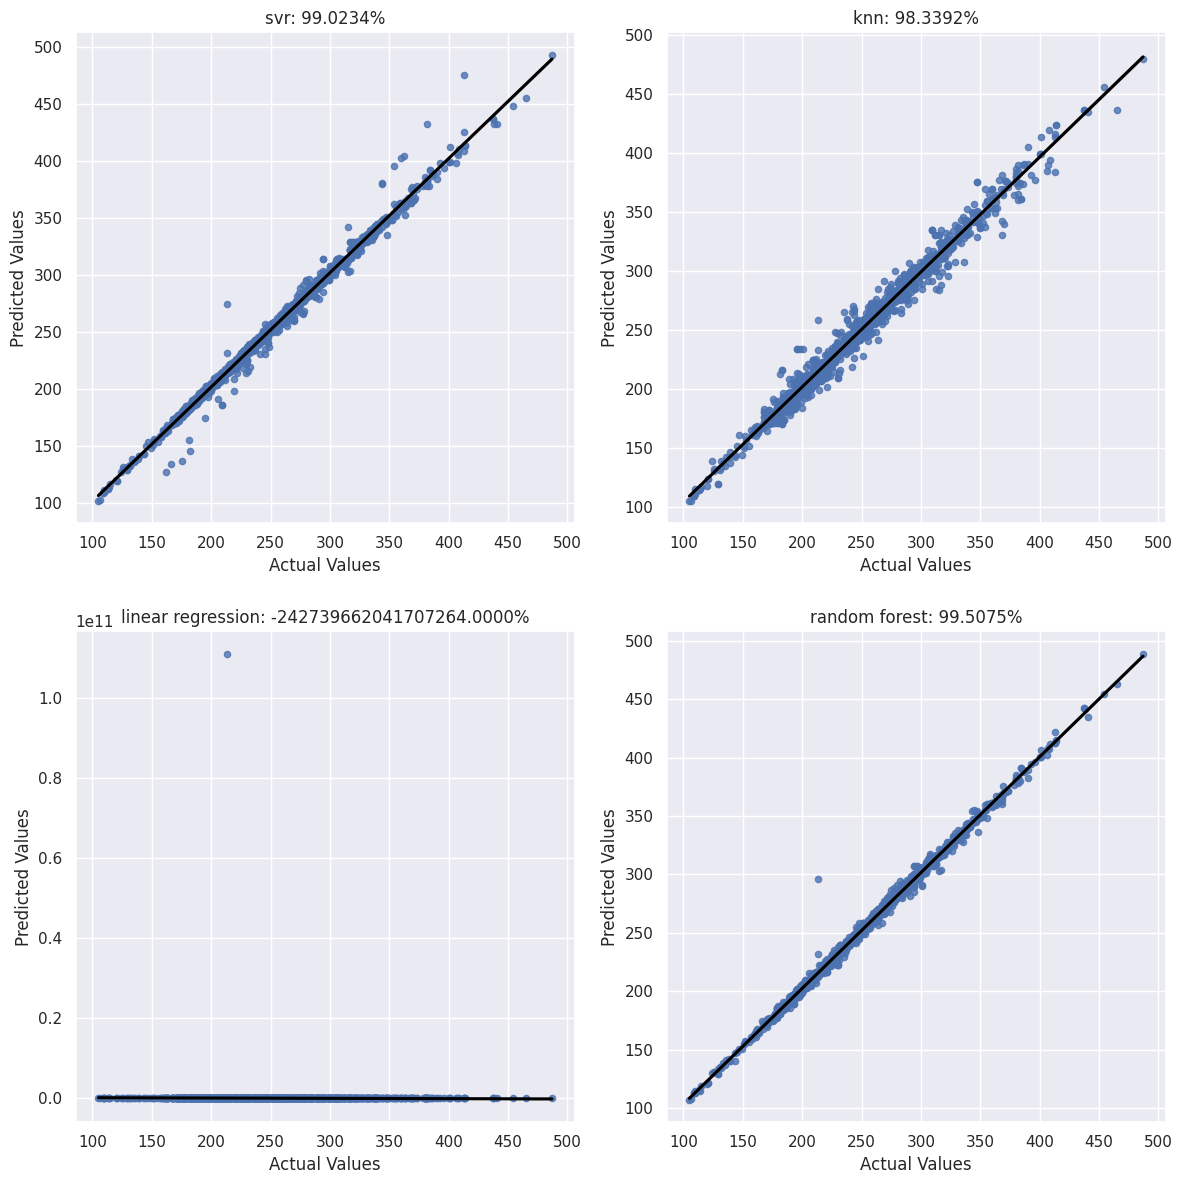

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
reg_models = {}

for (model_name, model), ax in zip(models.items(), axes.flatten()):
    reg_model = model.fit(X_train_data, y_train)
    score = reg_model.score(X_test_data, y_test) * 100

    y_pred = reg_model.predict(X_test_data)

    sns.regplot(x= y_test, y= y_pred, ax=ax, scatter_kws={'s': 20}, line_kws={'color': 'black'})  # Corrected order of y-values and x-values
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')  # Adjusted label
    ax.set_title(f"{model_name}: {score:.4f}%")

    reg_models[model_name] = reg_model

plt.tight_layout()
plt.show()